# <font color = red> Multiple Linear Regression (House Price Prediction)

In [1]:
# Loading all the required packages

import pandas as pd 
import numpy as np
import os as os

# Visuallisation packages
import matplotlib.pyplot as plt
import seaborn as sns

# To split Data
from sklearn.model_selection import train_test_split

# Regression model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

#Evaluation 
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

import warnings
warnings.filterwarnings("ignore")

In [2]:
def scatter_regplot (x,y,in_data):
    sns.regplot(x=x,y=y, data= in_data)
    plt.xlabel(x,fontsize=13)
    plt.ylabel(y,fontsize=13)
    plt.title("Scatter plot of "+ x + " & " + y, fontsize= 16 )
    plt.grid()
    plt.show()

In [3]:
# Load data
data = pd.read_csv(r"C:\Users\Prafull\Desktop\proschool\Data\Boston.csv")
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
data.tail()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,506,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273,21.0,396.90,7.88,11.9


In [5]:
data.shape

(506, 15)

In [6]:
data.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [8]:
data.describe().round(2)

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,253.50,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,146.21,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,1.00,0.01,0.00,0.46,0.00,0.38,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,127.25,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,253.50,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,379.75,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.22,16.96,25.00
max,506.00,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


## Remove unwanted column

In [9]:
data = data.drop(columns="Unnamed: 0",axis=1)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


## Check for missing data

In [10]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### No missing values detected

## <font color = blue > Our output data is Price here : medv

<AxesSubplot:xlabel='medv', ylabel='Density'>

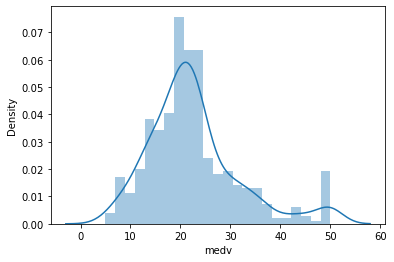

In [11]:
sns.distplot(data["medv"])

### This plot looks normal with some outliers

# <font color = green > Univariate Analysis

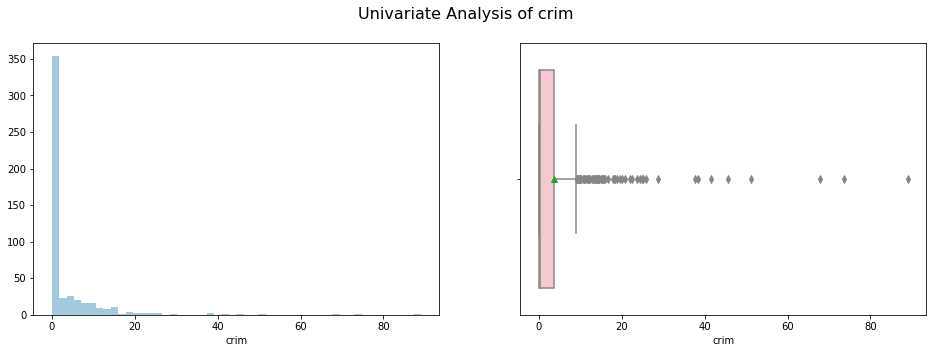

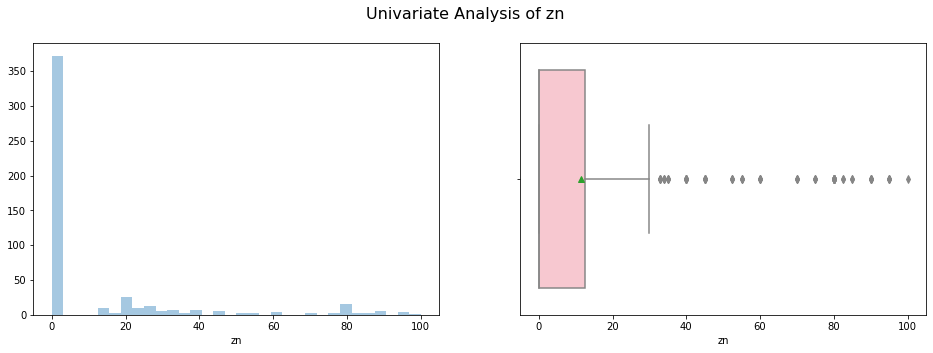

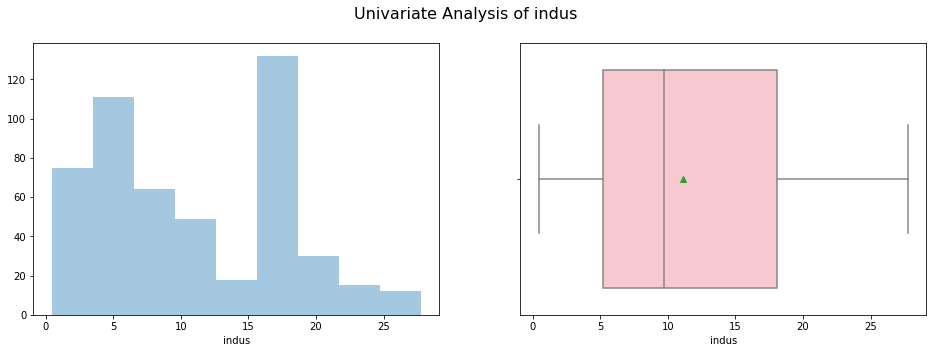

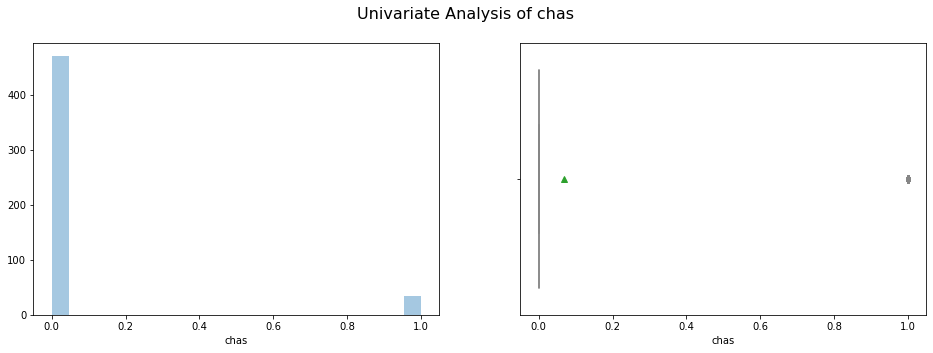

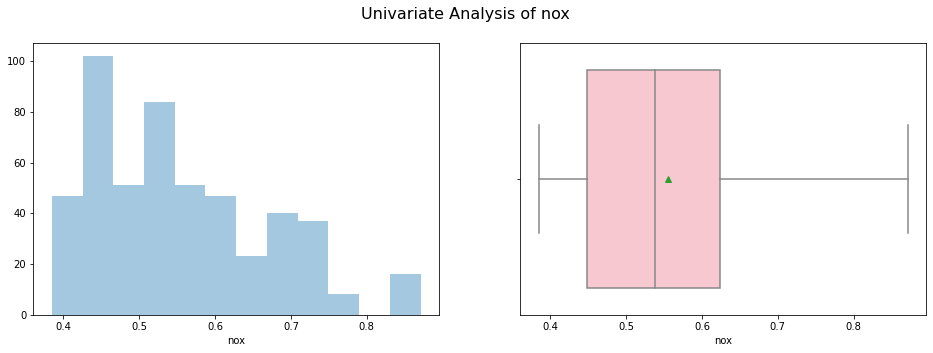

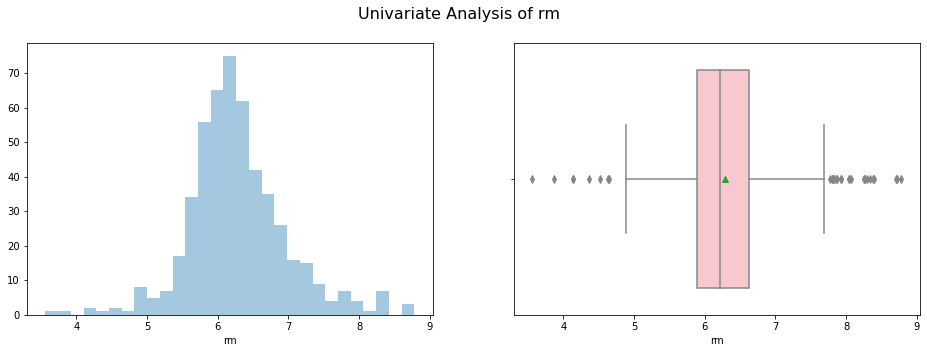

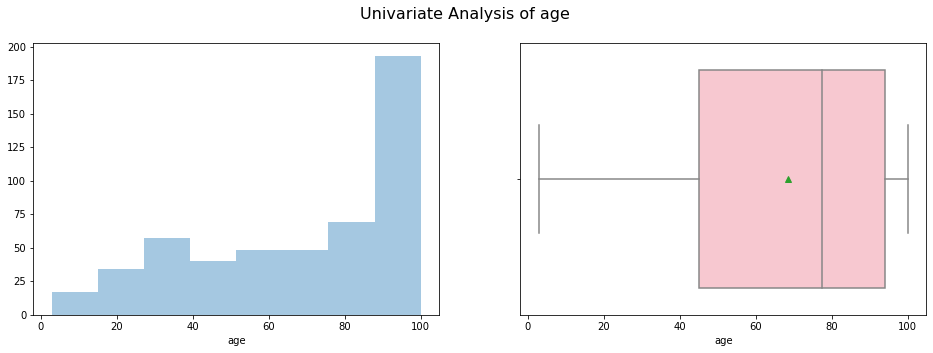

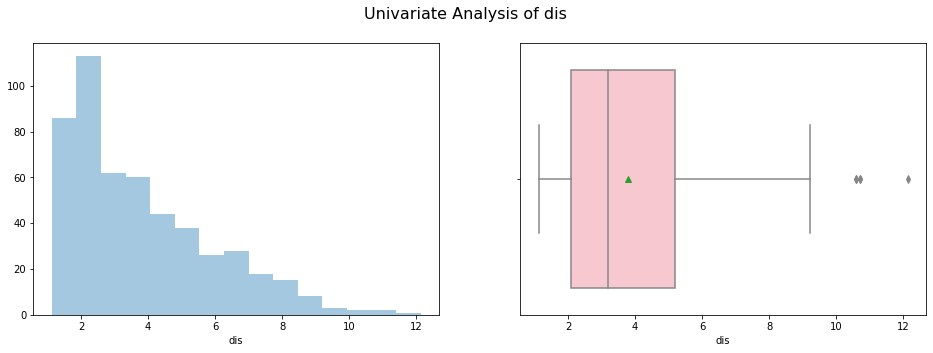

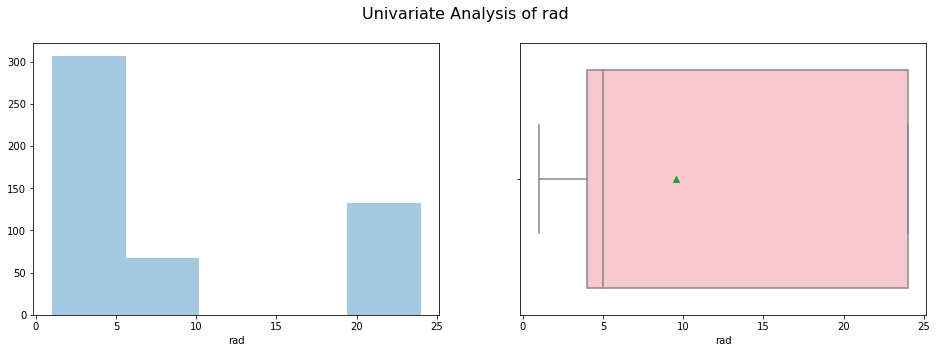

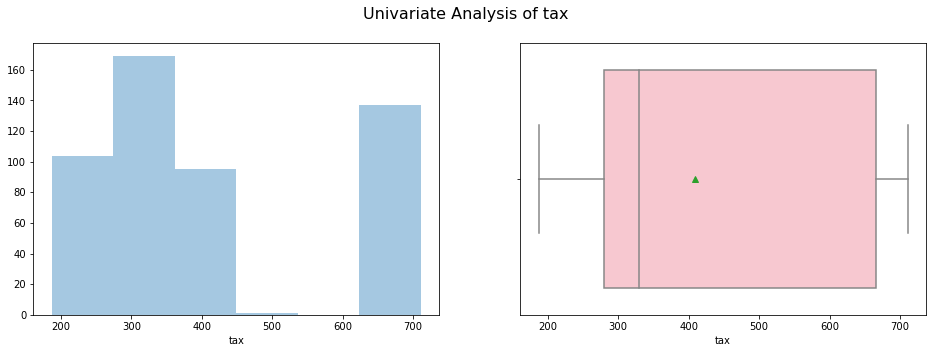

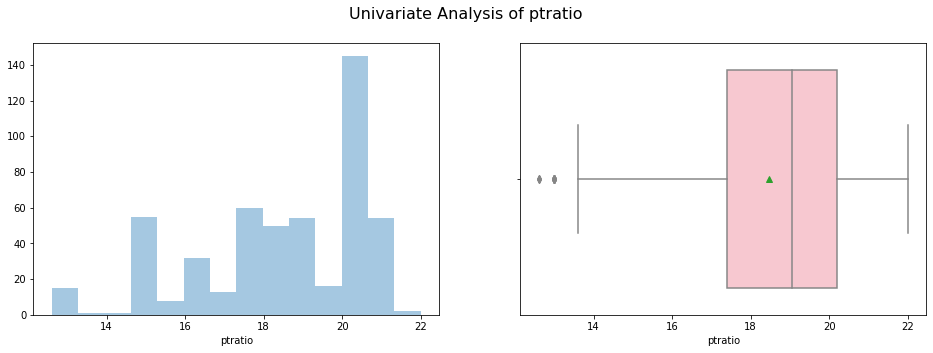

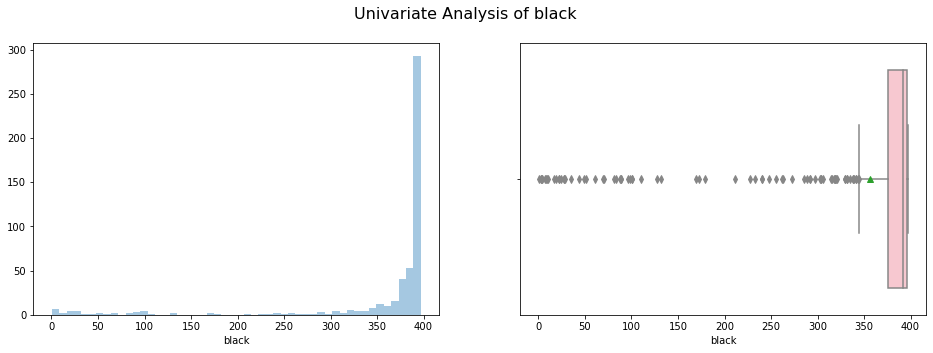

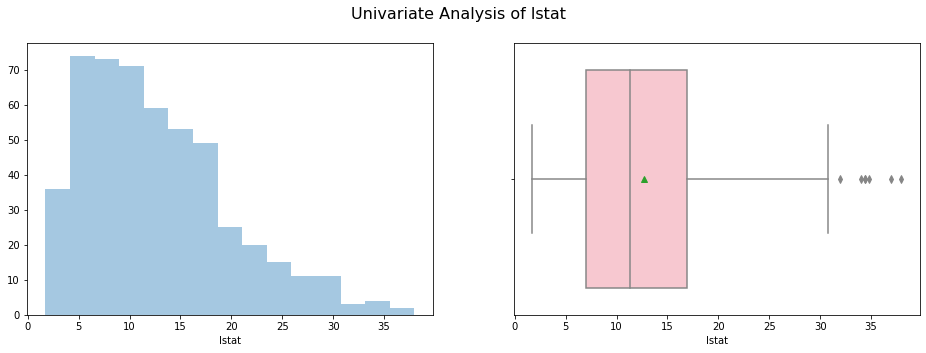

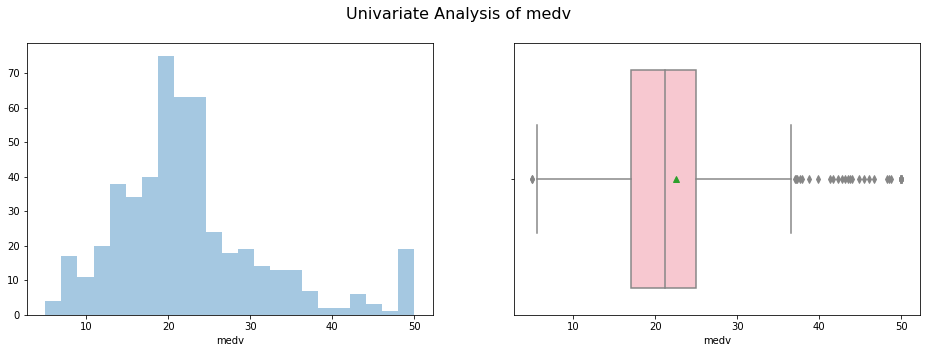

In [12]:
x_axis = data.columns.tolist()
for x in x_axis:
    fig,axes = plt.subplots(1,2, figsize=(16,5))
    sns.distplot(data[x],ax=axes[0],kde=False)
    sns.boxplot(data[x],ax=axes[1],orient='h',showmeans=True,color='pink')
    fig.suptitle("Univariate Analysis of "+ x, fontsize= 16)
    plt.show()

# <font color = green > Bi Variate analysis

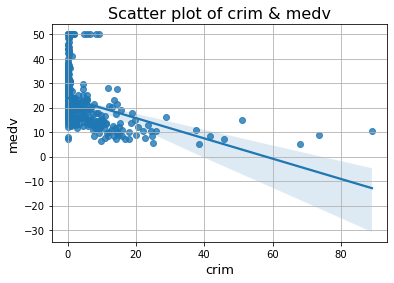

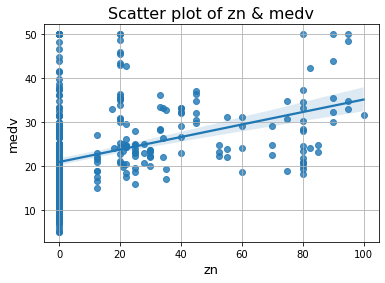

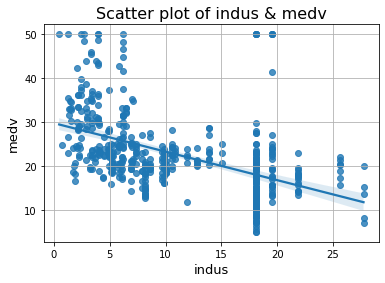

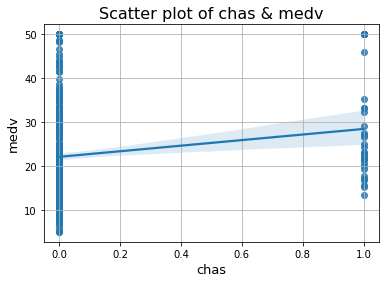

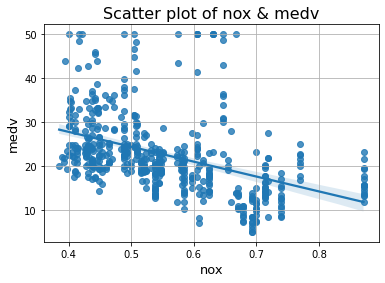

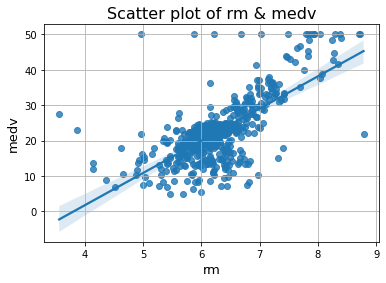

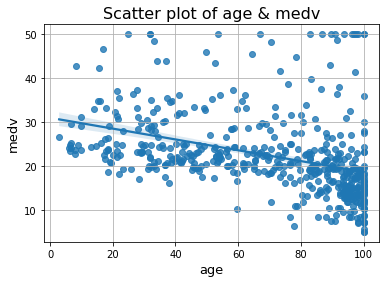

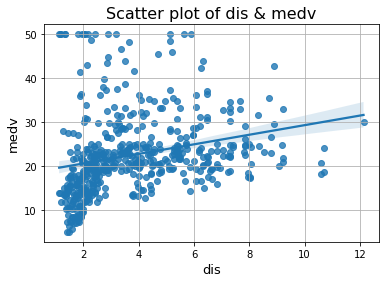

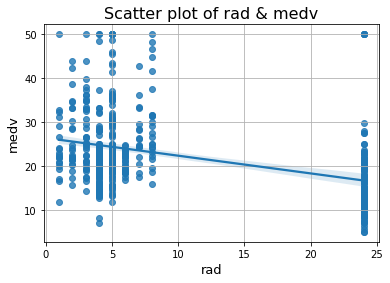

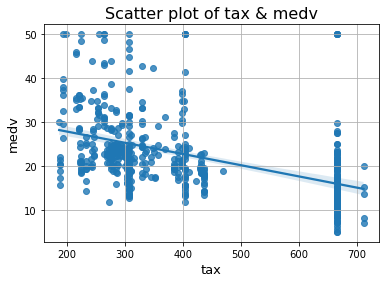

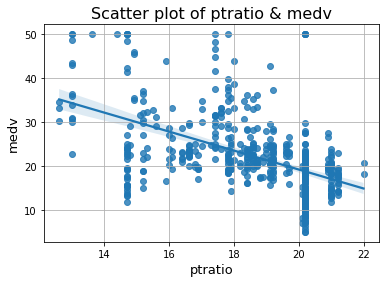

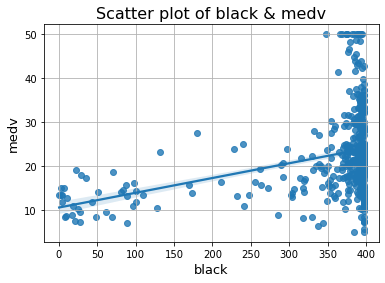

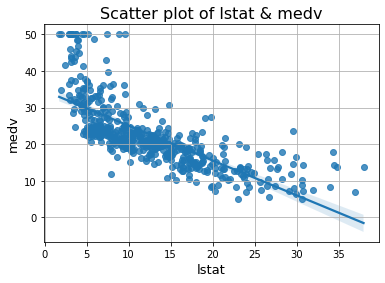

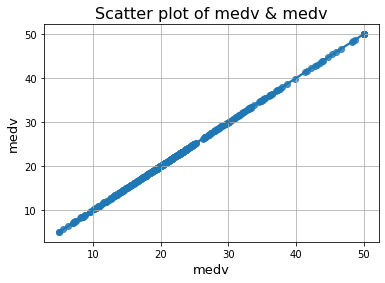

In [13]:
x_axis = data.columns.tolist()
y_axis = "medv"

for x in x_axis:
    scatter_regplot(x= x, y = y_axis , in_data=data )

## From Scatter plot it looks like lstat and rm have some linearity

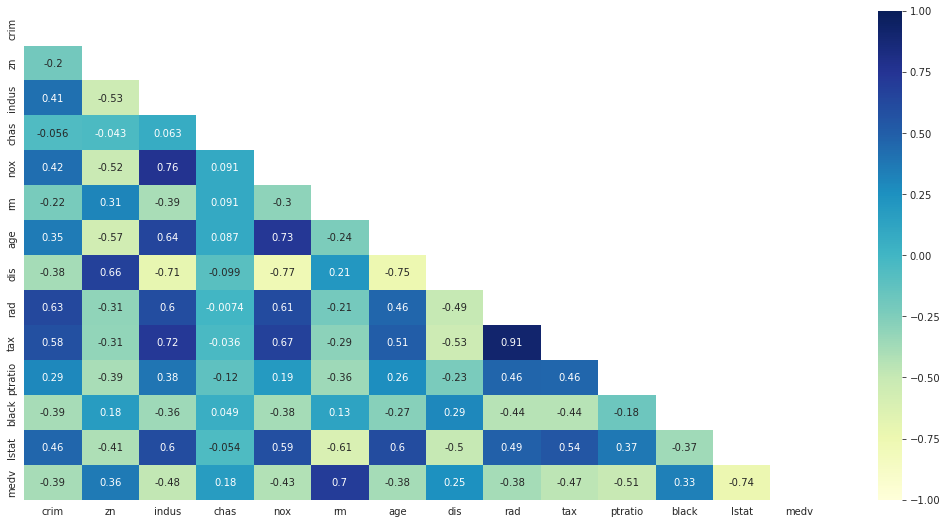

In [14]:
corr = data .corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="YlGnBu")

### rm is having positive corelation , lstat is having negative corelation with pirce ie. medv

# <font color= red > Model-1 : OLS with all features

In [15]:
data_2 = data.copy()

In [16]:
data_2 = data_2.drop("medv",axis=1).columns

In [17]:
X = data[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat']]
y = data[['medv']]

In [18]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100)

In [19]:
X_train.shape,X_test.shape

((404, 13), (102, 13))

In [20]:
X_train_1 = sm.add_constant(X_train)    # Add Constant

lm = sm.OLS(y_train,X_train_1)        # Model
lm = lm.fit()

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     82.67
Date:                Sun, 08 May 2022   Prob (F-statistic):          2.38e-103
Time:                        21:29:32   Log-Likelihood:                -1194.4
No. Observations:                 404   AIC:                             2417.
Df Residuals:                     390   BIC:                             2473.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.3338      5.723      6.349      0.000      25.082      47.585
crim          -0.0815      0.044     -1.870      0.062      -0.167       0.004
zn             0.0480      0.015      3.127      0.002       0.018       0.078
indus         -0.0055      0.070     -0.078      0.938      -0.144       0.133
chas           3.0626      0.915      3.345      0.001       1.263       4.862
nox          -16.1369      4.262     -3.786      0.000     -24.516      -7.758
rm             3.6725      0.473      7.765      0.000       2.743       4.602
age           -0.0085      0.015     -0.573      0.567      -0.038       0.021
dis           -1.5174      0.228     -6.660      0.000      -1.965      -1.069
rad            0.2873      0.074      3.888      0.000       0.142       0.433
tax           -0.0121      0.004     -2.893      0.004      -0.020      -0.004
ptratio       -0.9242      0.148     -6.241      0.000      -1.215      -0.633
black          0.0095      0.003      3.006      0.003       0.003       0.016
lstat         -0.4859      0.057     -8.518      0.000      -0.598      -0.374
==============================================================================
Omnibus:                      134.941   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              517.166
Skew:                           1.452   Prob(JB):                    5.00e-113
Kurtosis:                       7.722   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# From this lets take age p value
p_value_age = 0.567
if p_value_age<= 0.05:
    print("Reject Ho : There is relationship")
else:
    print("Accept Ho : No Relationship")

Accept Ho : No Relationship


In [22]:
# crim p value
p_value_crim = 0.062
if p_value_age<= 0.05:
    print("Reject Ho : There is relationship")
else:
    print("Accept Ho : No Relationship")

Accept Ho : No Relationship


In [23]:
# Indus p value
p_value_crim = 0.938
if p_value_age<= 0.05:
    print("Reject Ho : There is relationship")
else:
    print("Accept Ho : No Relationship")

Accept Ho : No Relationship


### From this OLS model we can see that by looking at p value there is no relationship between 'crim' , 'Indus' and 'age' with output variable

# <font color = red>    Model 2 : OLS (Droping columns 'age',Indus and crim)

In [24]:
data_3 = data_2.copy()

In [25]:
data_3 = data_3.drop(["crim", "indus", "age"])

In [26]:
data_3

Index(['zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black',
       'lstat'],
      dtype='object')

In [27]:
# Define X and y Variables
X = data[['zn', 'chas', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'black',
       'lstat']]
y = data[["medv"]]

In [28]:
# Split the data using train test split with train size of 80%
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size= 0.8, random_state= 100)

In [29]:
X_train.shape,X_test.shape

((404, 10), (102, 10))

In [30]:
# Add intercept
X_train_1 = sm.add_constant(X_train)

lm = sm.OLS(y_train,X_train_1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.731
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     106.9
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.52e-105
Time:                        21:29:33   Log-Likelihood:                -1196.4
No. Observations:                 404   AIC:                             2415.
Df Residuals:                     393   BIC:                             2459.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         35.6064      5.676      6.273      0.000      24.448      46.765
zn             0.0459      0.015      3.051      0.002       0.016       0.076
chas           3.1342      0.909      3.448      0.001       1.347       4.921
nox          -16.2163      3.969     -4.085      0.000     -24.020      -8.412
rm             3.6683      0.462      7.946      0.000       2.761       4.576
dis           -1.4230      0.209     -6.809      0.000      -1.834      -1.012
rad            0.2467      0.066      3.724      0.000       0.116       0.377
tax           -0.0119      0.004     -3.240      0.001      -0.019      -0.005
ptratio       -0.9217      0.146     -6.301      0.000      -1.209      -0.634
black          0.0102      0.003      3.240      0.001       0.004       0.016
lstat         -0.5198      0.052    -10.019      0.000      -0.622      -0.418
==============================================================================
Omnibus:                      128.300   Durbin-Watson:                   2.072
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              476.608
Skew:                           1.385   Prob(JB):                    3.21e-104
Kurtosis:                       7.543   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## From this it looks like there is no change in R2 value, so we will check linearity assumtion 

# <font color = red >  Model 3: OLS with lstat only

In [31]:
# Define X and y variable
X = data[["lstat"]]    # input data
y = data[["medv"]]     # output data

In [32]:
# Use train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=100)

In [33]:
X_train.shape,y_train.shape

((404, 1), (404, 1))

In [34]:
# Model
X_train_1 = sm.add_constant(X_train)    # Add intercept

lm = sm.OLS(y_train,X_train_1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     476.7
Date:                Sun, 08 May 2022   Prob (F-statistic):           2.95e-70
Time:                        21:29:34   Log-Likelihood:                -1303.7
No. Observations:                 404   AIC:                             2611.
Df Residuals:                     402   BIC:                             2619.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.1265      0.608     56.086      0.000      32.930      35.323
lstat         -0.9133      0.042    -21.833      0.000      -0.996      -0.831
==============================================================================
Omnibus:                      112.446   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              240.855
Skew:                           1.455   Prob(JB):                     5.00e-53
Kurtosis:                       5.416   Cond. No.                         29.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Looks like lstat alone can give only 54% accuracy which means we need to use rm feature with lstat

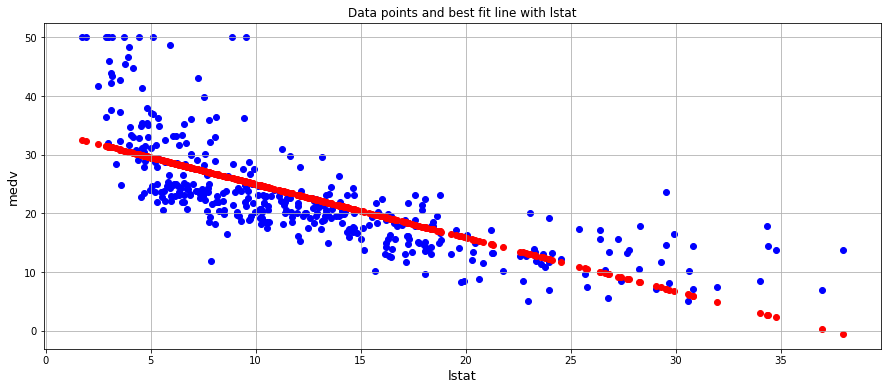

In [35]:
# Plot the scatter plot between lstat and medv with predicted value
plt.figure(figsize=(15,6))
plt.scatter(X_train["lstat"],y_train, color = 'blue')
plt.scatter(X_train["lstat"],lm.predict(X_train_1), color = 'red')
plt.xlabel("lstat", fontsize = 13)
plt.ylabel("medv",fontsize = 13)
plt.title("Data points and best fit line with lstat")
plt.grid()
plt.show()

# <font color= red > Model 4 : OLS with rm and lstat

In [36]:
# Define the variable
X = data[["rm","lstat"]]
y = data[["medv"]]

In [37]:
# Use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [38]:
# Add constant
X_train_1 = sm.add_constant(X_train)

In [39]:
# Model
lm = sm.OLS(y_train, X_train_1)
lm = lm.fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     340.4
Date:                Sun, 08 May 2022   Prob (F-statistic):           3.78e-87
Time:                        21:29:35   Log-Likelihood:                -1261.2
No. Observations:                 404   AIC:                             2528.
Df Residuals:                     401   BIC:                             2540.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1548      3.579     -0.043      0.966      -7.190       6.881
rm             4.8655      0.502      9.693      0.000       3.879       5.852
lstat         -0.6159      0.049    -12.670      0.000      -0.711      -0.520
==============================================================================
Omnibus:                      108.503   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.585
Skew:                           1.280   Prob(JB):                     1.77e-64
Kurtosis:                       6.300   Cond. No.                         205.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## This looks like it increases R squared value which gives accuracy of approx 63% 

# <font color = red > Model 5 : OLS with lstat and lstat polynomial features

In [40]:
from sklearn.preprocessing import PolynomialFeatures

In [41]:
# define variables
X = data[["lstat"]]
y = data[["medv"]]

# Split the data for train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y , train_size = 0.8, random_state = 100) 

# Transform the features
polynomial_features = PolynomialFeatures(degree = 2)
X_train_poly = polynomial_features.fit_transform(X_train)

In [42]:
# fit transformed feature in to linear model 
poly_model = sm.OLS(y_train,X_train_poly)
poly_model = poly_model.fit()
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     366.4
Date:                Sun, 08 May 2022   Prob (F-statistic):           3.12e-91
Time:                        21:29:35   Log-Likelihood:                -1251.7
No. Observations:                 404   AIC:                             2509.
Df Residuals:                     401   BIC:                             2521.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.5867      0.946     45.018      0.000      40.727      44.446
x1            -2.3059      0.134    -17.269      0.000      -2.568      -2.043
x2             0.0429      0.004     10.850      0.000       0.035       0.051
==============================================================================
Omnibus:                       86.168   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.768
Skew:                           1.079   Prob(JB):                     1.14e-43
Kurtosis:                       5.662   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## In this we got approx 64% accuracy which is increasing

In [43]:
# Lets try this model on test data

X_test_poly = polynomial_features.fit_transform(X_test)

In [44]:
# Calculate R2 
rsq = r2_score(y_test["medv"], poly_model.predict(X_test_poly))    # On test data (In summary output its on train data)
print ("R Square:", round(rsq, 3))

R Square: 0.621


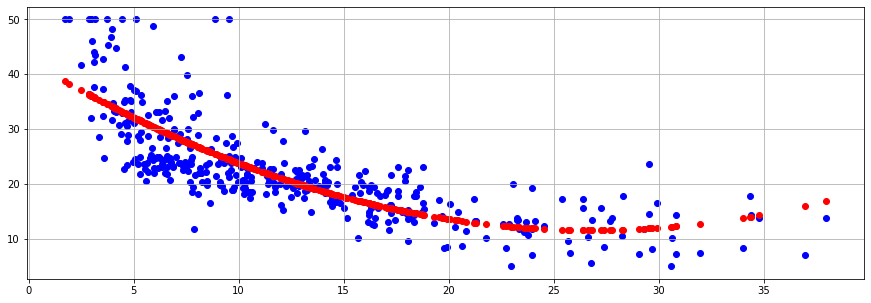

In [45]:
plt.figure(figsize = (15,5))
plt.scatter(X_train["lstat"], y_train,  color='blue')
plt.scatter(X_train["lstat"], poly_model.predict(X_train_poly),  color='red')
plt.grid()
plt.show()

# <font color = red > Model 6: OLS with lstat & rm polynomial feature

In [46]:
# Define variable
X = data[["lstat","rm"]]
y = data[["medv"]]

# Split the data in 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.8, random_state= 100)

#Polynomial feature
polynomial_features = PolynomialFeatures(degree = 2)
X_train_poly = polynomial_features.fit_transform(X_train)

In [47]:
# fit transformed feature in linear model
poly_model = sm.OLS(y_train, X_train_poly)
poly_model = poly_model.fit()
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     241.8
Date:                Sun, 08 May 2022   Prob (F-statistic):          3.37e-118
Time:                        21:29:36   Log-Likelihood:                -1179.8
No. Observations:                 404   AIC:                             2372.
Df Residuals:                     398   BIC:                             2396.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9786     17.009      1.704      0.089      -4.460      62.417
x1             1.2380      0.571      2.169      0.031       0.116       2.360
x2            -6.7973      4.612     -1.474      0.141     -15.864       2.269
x3             0.0040      0.006      0.724      0.469      -0.007       0.015
x4            -0.3472      0.071     -4.880      0.000      -0.487      -0.207
x5             1.1580      0.320      3.616      0.000       0.528       1.788
==============================================================================
Omnibus:                      131.555   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1696.269
Skew:                           0.991   Prob(JB):                         0.00
Kurtosis:                      12.841   Cond. No.                     2.62e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.62e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## we got 75% accuracy using polynomial feature which good, lets test this on test data

In [48]:
# Test data 
X_test_poly = polynomial_features.fit_transform(X_test)

In [49]:
# Calculate R squared value
rsq = r2_score(y_test["medv"],poly_model.predict(X_test_poly))
print("R Squared value :- ",round(rsq,3))

R Squared value :-  0.764


## we got 76% accuracy on test data

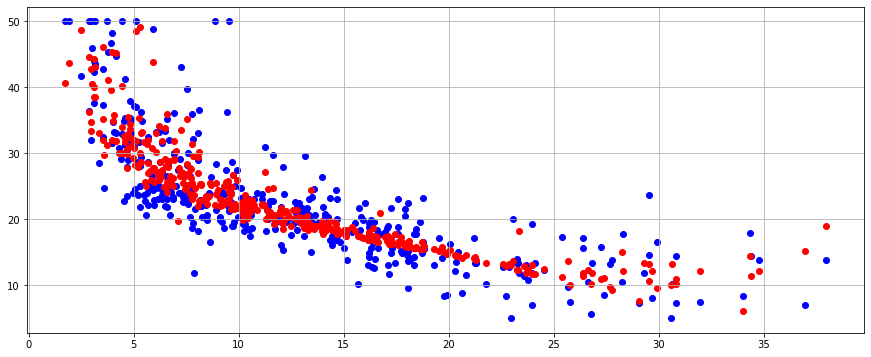

In [50]:
# Lets visualise
plt.figure(figsize=(15,6))

plt.scatter(X_train["lstat"],y_train, color= 'blue')
plt.scatter(X_train["lstat"],poly_model.predict(X_train_poly), color = 'red')
plt.grid()
plt.show()

# <font color = red >  Error Analysis on model 6

In [51]:
# Error = Actual - predicted
errors_train = y_train['medv']-poly_model.predict(X_train_poly)
errors_test  = y_test['medv']-poly_model.predict(X_test_poly)

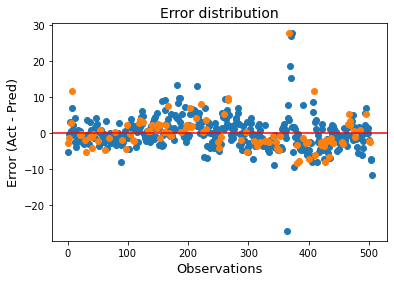

In [52]:
# Error Distribution
plt.scatter(X_train.index, errors_train)   # y_train.index & X_train.index is same
plt.scatter(y_test.index, errors_test)
plt.xlabel("Observations", fontsize = 13)
plt.ylabel("Error (Act - Pred)",  fontsize = 13)
plt.title("Error distribution",  fontsize = 14)
plt.axhline(0, color = "red")
plt.show()

## From this error distribution plot we can see that due some outliers there are high errors. If there are high error there will be low accuracy.

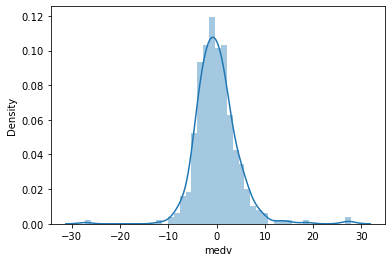

In [53]:
# Lets check normality
sns.distplot(errors_train)
plt.show()

### Normal with few outliers

In [54]:
# Lets check the z score                            # It should be between -3SD to +3SD 
zscore(errors_train).min(),zscore(errors_train).max()

(-6.062086226659347, 6.192470634668769)

### SD is -6 to +6 which is very high we need to remove outlier to increase accuracy

In [55]:
errors_train[errors_train < -20] 

364   -27.203789
Name: medv, dtype: float64

In [56]:
# Lets check values for this index 
data[data.index == 364][["lstat","rm","medv"]]

,lstat,rm,medv
364,5.29,8.78,21.9


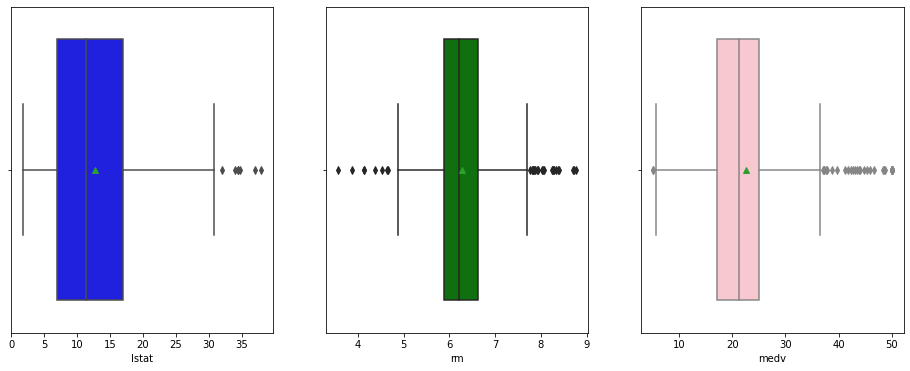

In [57]:
fig,axes = plt.subplots(1,3, figsize =(16,6))
sns.boxplot(data["lstat"], ax=axes[0], orient='h', showmeans=True, color= 'blue')
sns.boxplot(data["rm"], ax=axes[1], orient='h', showmeans=True, color= 'green')
sns.boxplot(data["medv"], ax=axes[2], orient='h', showmeans=True, color= 'pink')
plt.show()

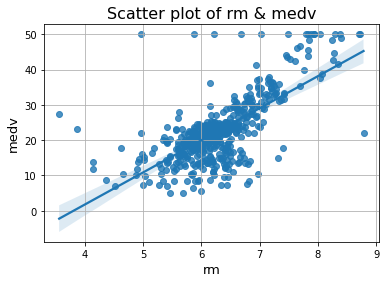

In [58]:
scatter_regplot("rm", "medv", in_data = data)

## We are going to replace one outlier which is at right side having rm ~8.8 and medv ~23

## <font color = blue > Replace outlier

In [59]:
data_1 = data.copy()
data_1.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [60]:
data_1["rm"].median()

6.2085

In [61]:
# Replace rm outlier with median of rm
data_1["rm"] = np.where((data_1["rm"] > 8 ) & (data_1["medv"] < 25), data_1["rm"].median(), data_1["rm"])

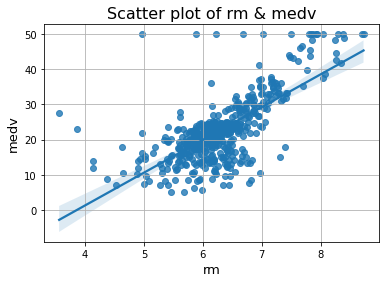

In [62]:
scatter_regplot("rm","medv",in_data = data_1)

### Lets use this data for model

# <font color = red > Model 7 : OLS with Data_1 using polynomial features

In [63]:
# Define variable
X = data_1[["lstat","rm"]]
y = data_1[["medv"]]

# use train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 100)

In [64]:
# Using polynomial features transformed it into higher degree
polynomial_features = PolynomialFeatures(degree = 2)
X_train_poly = polynomial_features.fit_transform(X_train)

In [65]:
# fit the transform features into linear regression
poly_model = sm.OLS(y_train,X_train_poly)
poly_model = poly_model.fit()
poly_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     278.4
Date:                Sun, 08 May 2022   Prob (F-statistic):          1.67e-127
Time:                        21:29:40   Log-Likelihood:                -1158.0
No. Observations:                 404   AIC:                             2328.
Df Residuals:                     398   BIC:                             2352.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         48.9242     16.385      2.986      0.003      16.712      81.136
x1             1.2780      0.540      2.368      0.018       0.217       2.339
x2           -13.8065      4.490     -3.075      0.002     -22.633      -4.980
x3             0.0012      0.005      0.226      0.822      -0.009       0.011
x4            -0.3354      0.067     -4.978      0.000      -0.468      -0.203
x5             1.7424      0.315      5.528      0.000       1.123       2.362
==============================================================================
Omnibus:                      188.038   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1637.086
Skew:                           1.767   Prob(JB):                         0.00
Kurtosis:                      12.206   Cond. No.                     2.66e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.66e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## We got 77.8% accuracy after removing outlier

## Now lets see Error distribution

In [66]:
# Error  = Actual - Predicted
errors_train = y_train["medv"] - poly_model.predict(X_train_poly)
errors_test = y_test["medv"] - poly_model.predict(X_test_poly)

Text(0.5, 1.0, 'Error Distribution')

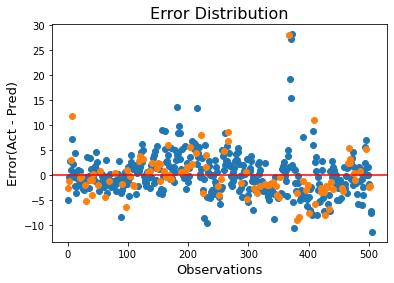

In [67]:
# Lets Visualise it
plt.scatter(X_train.index, errors_train)
plt.scatter(X_test.index, errors_test)
plt.axhline(y = 0, color= 'red')
plt.ylabel("Error(Act - Pred)", fontsize = 13)
plt.xlabel("Observations", fontsize = 13)
plt.title("Error Distribution", fontsize = 16)

# <font color = green > Conclusion
    1. Using polynomial feature we got 77.8% Accuracy